<a href="https://colab.research.google.com/github/WanjaWhoopie/Credit-Scoring/blob/main/autobin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install optbinning

In [ ]:
# import libraries
import numpy as np
import pandas as pd

from optbinning import BinningProcess
from optbinning import Scorecard
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks
from sklearn.linear_model import LogisticRegression

pd.options.display.max_rows=None
pd.options.display.max_columns=None

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data cleaning
class Preparation():

    def __init__(self, data):
        self.data = data

    def clean_data(self):
        self.data['Loan Status'] = np.where((self.data['CREDIT SCORE'] > 670),1,0)

        # remove 'days' string from columns
        self.data['PAYMENT_PERIOD'] = self.data['PAYMENT_PERIOD'].str.rstrip(' days')
        self.data['PERIOD_TO_NEXT_PAYMENT'] = self.data['PERIOD_TO_NEXT_PAYMENT'].str.rstrip(' days')

        # drop unnecessary columns

        cols_to_drop = ['PROPERTY COUNTY','INSTALLATION ZIP','INSTALLATION CITY','CREDIT SCORE']
        self.data.drop(columns=cols_to_drop, inplace=True)

        # change all column names to upper case
        self.data.columns = self.data.columns.str.upper()

        return self.data

In [ ]:
# load data
data = pd.read_csv('loan_data.csv', index_col=False)

# create clean data
prepare = Preparation(data)
df = prepare.clean_data()
df.to_csv("clean_data.csv", index=False)
df.head()

,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,INTEREST RATE,DEBT TO INCOME,LAST PAYMENT AMOUNT,PAYMENT AMOUNT,CURRENT BALANCE,UNAPPLIED CASH,DELINQUENT AMOUNT,TOTAL INTEREST PAID,TOTAL LATE CHARGE PAID,PAYMENTS REMAINING,DAYS DELINQUENT,ACCOUNT CODE,MONTHS SINCE ORIGINATION,PAYMENTS MADE,PURPOSE,LOAN TYPE,UNDERWRITING,PLEDGED,CONTRACT DATE YEAR,SETUP DATE YEAR,ORIGINAL MATURITY DATE YEAR,CURRENT MATURITY DATE YEAR,ACCOUNT CODE DATE YEAR,PAYMENT_PERIOD,PERIOD_TO_NEXT_PAYMENT,LOAN STATUS
0,2400.0,120,3.99,0.9966,509.33,24.29,0.00,0.0,0.0,94.35,20.0,0.0,-25,P,25.7,120.0,EE,Smart Energy,Tier 2,Unpledged,2016,2016,2026,2017,2017,401,25,0
1,18350.0,180,3.49,0.0237,18044.72,131.09,0.00,0.0,0.0,219.08,0.0,0.0,-24,P,41.2,180.0,PV,Smart Energy,Tier 1,Unpledged,2014,2014,2029,2015,2015,96,24,1
2,19269.4,180,3.49,0.2748,137.65,137.65,17849.22,0.0,0.0,919.87,0.0,163.0,-13,A,17.5,17.0,EE,Smart Energy,Tier 1,Series 2016A EE Bonds,2016,2016,2031,2031,2016,488,31,1
3,24026.0,180,3.49,0.1719,171.63,171.63,21717.59,0.0,0.0,1467.45,0.0,158.0,-13,A,22.6,22.0,PV,Smart Energy,Tier 1,Series 2015A PV Bonds,2016,2016,2031,2031,2016,638,31,1
4,4167.2,120,3.49,0.4723,41.19,41.19,2055.07,0.0,0.0,606.41,0.0,54.0,-109,A,63.9,66.0,EE,Smart Energy,Tier 1,Series2013A EE Bonds,2012,2012,2022,2022,2012,1885,122,1


In [ ]:
df['PURPOSE'].unique()

array(['EE', 'PV', 'RHNY', 'EE&PV', 'ST', 'EE&RHNY'], dtype=object)

In [ ]:
df['PAYMENT_PERIOD'].replace('>','')
 # convert all columns of DataFrame to int
df['PAYMENT_PERIOD'] = df['PAYMENT_PERIOD'].apply(pd.to_numeric)

In [ ]:
df['PERIOD_TO_NEXT_PAYMENT'].replace('<','')
df['PERIOD_TO_NEXT_PAYMENT'] = df['PERIOD_TO_NEXT_PAYMENT'].apply(pd.to_numeric)

In [ ]:
df.head()

,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,INTEREST RATE,DEBT TO INCOME,LAST PAYMENT AMOUNT,PAYMENT AMOUNT,CURRENT BALANCE,UNAPPLIED CASH,DELINQUENT AMOUNT,TOTAL INTEREST PAID,TOTAL LATE CHARGE PAID,PAYMENTS REMAINING,DAYS DELINQUENT,ACCOUNT CODE,MONTHS SINCE ORIGINATION,PAYMENTS MADE,PURPOSE,LOAN TYPE,UNDERWRITING,PLEDGED,CONTRACT DATE YEAR,SETUP DATE YEAR,ORIGINAL MATURITY DATE YEAR,CURRENT MATURITY DATE YEAR,ACCOUNT CODE DATE YEAR,PAYMENT_PERIOD,PERIOD_TO_NEXT_PAYMENT,LOAN STATUS
0,2400.0,120,3.99,0.9966,509.33,24.29,0.00,0.0,0.0,94.35,20.0,0.0,-25,P,25.7,120.0,EE,Smart Energy,Tier 2,Unpledged,2016,2016,2026,2017,2017,401,25,0
1,18350.0,180,3.49,0.0237,18044.72,131.09,0.00,0.0,0.0,219.08,0.0,0.0,-24,P,41.2,180.0,PV,Smart Energy,Tier 1,Unpledged,2014,2014,2029,2015,2015,96,24,1
2,19269.4,180,3.49,0.2748,137.65,137.65,17849.22,0.0,0.0,919.87,0.0,163.0,-13,A,17.5,17.0,EE,Smart Energy,Tier 1,Series 2016A EE Bonds,2016,2016,2031,2031,2016,488,31,1
3,24026.0,180,3.49,0.1719,171.63,171.63,21717.59,0.0,0.0,1467.45,0.0,158.0,-13,A,22.6,22.0,PV,Smart Energy,Tier 1,Series 2015A PV Bonds,2016,2016,2031,2031,2016,638,31,1
4,4167.2,120,3.49,0.4723,41.19,41.19,2055.07,0.0,0.0,606.41,0.0,54.0,-109,A,63.9,66.0,EE,Smart Energy,Tier 1,Series2013A EE Bonds,2012,2012,2022,2022,2012,1885,122,1


In [ ]:
variable_names = list(df.columns)
variable_names.remove('LOAN STATUS')

X = df[variable_names]
y = df["LOAN STATUS"].values

In [ ]:
selection_criteria = {
    "iv": {"min": 0.02, "max": 0.7, "strategy": "highest", "top": 10},
    "quality_score": {"min": 0.01}
}

binning_process = BinningProcess(variable_names,
                                 selection_criteria=selection_criteria)
binning_process.fit(X, y)

BinningProcess(selection_criteria={'iv': {'max': 0.7, 'min': 0.02,
                                          'strategy': 'highest', 'top': 10},
                                   'quality_score': {'min': 0.01}},
               variable_names=['ORIGINAL LOAN AMOUNT', 'ORIGINAL TERM',
                               'INTEREST RATE', 'DEBT TO INCOME',
                               'LAST PAYMENT AMOUNT', 'PAYMENT AMOUNT',
                               'CURRENT BALANCE', 'UNAPPLIED CASH',
                               'DELINQUENT AMOUNT', 'TOTAL INTEREST PAID',
                               'TOTAL LATE CHARGE PAID', 'PAYMENTS REMAINING',
                               'DAYS DELINQUENT', 'ACCOUNT CODE',
                               'MONTHS SINCE ORIGINATION', 'PAYMENTS MADE',
                               'PURPOSE', 'LOAN TYPE', 'UNDERWRITING',
                               'PLEDGED', 'CONTRACT DATE YEAR',
                               'SETUP DATE YEAR', 'ORIGINAL MATURITY DATE YEAR'

In [ ]:
# binning_process.information(print_level=2)

In [ ]:
binning_process.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
0,ORIGINAL LOAN AMOUNT,numerical,OPTIMAL,False,4,0.0318954,0.00397146,0.0951753,0.109059
1,ORIGINAL TERM,numerical,OPTIMAL,False,2,0.031032,0.00384533,0.0562742,0.04103
2,INTEREST RATE,numerical,OPTIMAL,False,2,0.0238662,0.00297102,0.057733,0.0333945
3,DEBT TO INCOME,numerical,OPTIMAL,False,8,0.0736321,0.00914975,0.150029,0.0201557
4,LAST PAYMENT AMOUNT,numerical,OPTIMAL,False,7,0.0663863,0.00810879,0.124931,0.0621231
5,PAYMENT AMOUNT,numerical,OPTIMAL,False,8,0.0484317,0.00602131,0.120316,0.000693806
6,CURRENT BALANCE,numerical,OPTIMAL,True,7,0.111772,0.0136198,0.159388,0.19666
7,UNAPPLIED CASH,numerical,OPTIMAL,False,1,0,0,0,0
8,DELINQUENT AMOUNT,numerical,OPTIMAL,True,2,0.153259,0.0183258,0.122249,0.110145
9,TOTAL INTEREST PAID,numerical,OPTIMAL,False,10,0.060693,0.00753568,0.130134,0.00784944


In [ ]:
estimator = LogisticRegression(solver="lbfgs")
estimator

LogisticRegression()

In [ ]:
scorecard = Scorecard(binning_process=binning_process,
                      estimator=estimator, rounding=True, scaling_method="min_max",
                      scaling_method_params={"min": 300, "max": 850})
scorecard.fit(X, y)

Scorecard(binning_process=BinningProcess(selection_criteria={'iv': {'max': 0.7,
                                                                    'min': 0.02,
                                                                    'strategy': 'highest',
                                                                    'top': 10},
                                                             'quality_score': {'min': 0.01}},
                                         variable_names=['ORIGINAL LOAN AMOUNT',
                                                         'ORIGINAL TERM',
                                                         'INTEREST RATE',
                                                         'DEBT TO INCOME',
                                                         'LAST PAYMENT AMOUNT',
                                                         'PAYMENT AMOUNT',
                                                         'CURRENT BALANCE',
                                       

In [ ]:
# scorecard.information(print_level=2)

In [ ]:
# scorecard.table(style="summary")

In [ ]:
scorecard.intercept_

0

In [ ]:

scard = scorecard.table(style="detailed")
scard

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,CURRENT BALANCE,0,"(-inf, 1380.64)",2785,0.128223,153,2632,0.945063,-0.931177,0.078455,0.009467,-0.133987,48.0
1,CURRENT BALANCE,1,"[1380.64, 3954.80)",2990,0.137661,456,2534,0.847492,0.198823,0.005855,0.000731,-0.133987,60.0
2,CURRENT BALANCE,2,"[3954.80, 4738.35)",1088,0.050092,194,894,0.821691,0.386037,0.008590,0.001067,-0.133987,62.0
3,CURRENT BALANCE,3,"[4738.35, 6718.51)",2579,0.118738,415,2164,0.839085,0.262449,0.009005,0.001122,-0.133987,60.0
4,CURRENT BALANCE,4,"[6718.51, 9794.29)",3378,0.155525,496,2882,0.853168,0.154220,0.003916,0.000489,-0.133987,59.0
5,CURRENT BALANCE,5,"[9794.29, 12637.51)",2789,0.128407,383,2406,0.862675,0.076198,0.000767,0.000096,-0.133987,58.0
6,CURRENT BALANCE,6,"[12637.51, inf)",6111,0.281354,695,5416,0.886271,-0.139317,0.005184,0.000647,-0.133987,56.0
7,CURRENT BALANCE,7,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.133987,58.0
8,CURRENT BALANCE,8,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.133987,58.0
0,DELINQUENT AMOUNT,0,"(-inf, 4.59)",20082,0.924586,2284,17798,0.886266,-0.139274,0.017026,0.002127,-0.229442,55.0


In [ ]:
# create column
scard['Dummy Variable']=scard.apply(lambda x:'%s:%s' % (x['Variable'],x['Bin']),axis=1)
scard.tail(10)

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points,Dummy Variable
2,UNDERWRITING,2,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-1.081235,58.0,UNDERWRITING:Special
3,UNDERWRITING,3,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-1.081235,58.0,UNDERWRITING:Missing
0,PLEDGED,0,[Unpledged],4263,0.196271,1320,2943,0.690359,1.112086,0.352860,0.041966,0.227224,39.0,PLEDGED:['Unpledged']
1,PLEDGED,1,[Series 2016A EE Bonds],2966,0.136556,347,2619,0.883007,-0.107339,0.001512,0.000189,0.227224,60.0,PLEDGED:['Series 2016A EE Bonds']
2,PLEDGED,2,[Series 2015A EE Bonds],5473,0.251980,500,4973,0.908642,-0.383286,0.032062,0.003983,0.227224,64.0,PLEDGED:['Series 2015A EE Bonds']
3,PLEDGED,3,[Series2013A EE Bonds],3255,0.149862,293,2962,0.909985,-0.399563,0.020596,0.002557,0.227224,64.0,PLEDGED:['Series2013A EE Bonds']
4,PLEDGED,4,[Series 2018A PV Bonds],1558,0.071731,116,1442,0.925546,-0.606312,0.021000,0.002586,0.227224,68.0,PLEDGED:['Series 2018A PV Bonds']
5,PLEDGED,5,[Series 2015A PV Bonds],4205,0.193600,216,3989,0.948633,-1.002133,0.133667,0.016042,0.227224,75.0,PLEDGED:['Series 2015A PV Bonds']
6,PLEDGED,6,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.227224,58.0,PLEDGED:Special
7,PLEDGED,7,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.227224,58.0,PLEDGED:Missing


In [ ]:
# tuple_series = scard[['Variable','Bin']].apply(tuple, axis=1)
# scard['result'] = tuple_series.str.join(':')
# scard

In [ ]:
scard = scard[~scard['Bin'].isin(['Missing','Special'])]
scard.head()

SystemError: ignored

In [ ]:
y_pred = scorecard.predict_proba(X)[:, 1]

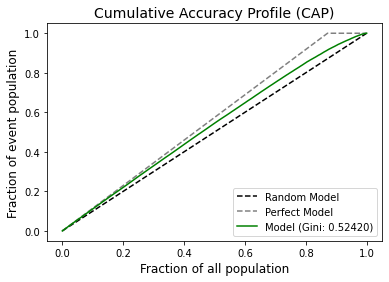

In [ ]:
plot_cap(y, y_pred)

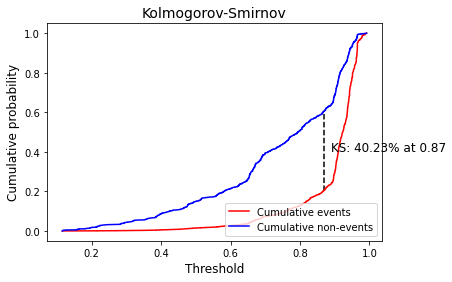

In [ ]:
plot_ks(y, y_pred)

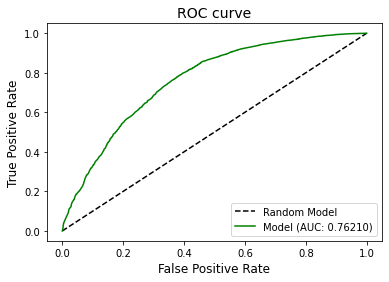

In [ ]:
plot_auc_roc(y, y_pred)

In [ ]:
num_df = df.select_dtypes(exclude='object')
num_cols = num_df.columns.values

variable_names = list(set([val.split(':')[0] for val in scard['Dummy Variable']])) # to have the same columns used to create the scorecard
num_variables = [x for x in variable_names if x in num_cols] # select numerical variables only
for i in num_variables:
    for j in scard['Dummy Variable']:
        if j.split(":")[0] in num_variables:
            for val in data[i].unique():
                print((float(j.split(':')[1].split(',')[0][1:])))
                print((float(j.split(':')[1].split(',')[1][:-1])))

                    # URRENT BALANCE:(-inf, 1380.64)

-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64
-inf
1380.64

ValueError: ignored

In [ ]:


# TEST FXN ONE

def find_new_data(data, scard):
    # numerical columns
    num_df = df.select_dtypes(exclude='object')
    num_cols = num_df.columns.values

    variable_names = list(set([val.split(':')[0] for val in scard['Dummy Variable']])) # to have the same columns used to create the scorecard
    num_variables = [x for x in variable_names if x in num_cols] # select numerical variables only

    # dummy_data = {} CURRENT BALANCE:(-inf, 1380.64)
    for i in num_variables:
        for j in scard['Dummy Variable']:
            if j.split(":")[0] in num_variables:
                for val in data[i].unique():
                   data[j] = np.where((val > float((j.split(':')[1].split(',')[0][1:]))) & (val <= float((j.split(':')[1].split(',')[1][:-1]))),1,0)

        return data

# write for all ranges


In [ ]:
df['CURRENT BALANCE'].unique()

In [ ]:
# tested on numerical columns
scard.dropna(inplace=True)
cols =  list(set(scard.Variable)) # original variables used in the score card
data = df[cols]
mydata = data.head(100)

new_df = find_new_data(mydata,scard)
new_df.head(10)


In [ ]:
# for numerical variables

def prepare_numerical_data(data, scard):
    """
    function to create dummy variables from numerical columns
    """
    # numerical columns
    num_df = df.select_dtypes(exclude='object')
    num_cols = num_df.columns.values

    variable_names = list(set([val.split(':')[0] for val in scard['Dummy Variable']])) # to have the same columns used to create the scorecard
    num_variables = [x for x in variable_names if x in num_cols] # select numerical variables only
    for i in num_variables:
        for j in scard['Dummy Variable']:
            if j.split(":")[0] in num_variables:
                for val in data[i].unique():
                    if (val > (float(j.split(':')[1].split(',')[0][1:]))) & (val <= (float(j.split(':')[1].split(',')[1][:-1]))):
                        data.loc[data[i] == val, j] = 1


                    else:
                        data.loc[data[i] == val, j] = 0


        # data.drop(columns=variable_names, inplace=True) CURRENT BALANCE:(-inf, 1380.64)

        return data

In [ ]:
# tested on numerical columns
scard.dropna(inplace=True)
cols =  list(set(scard.Variable)) # original variables used in the score card
data = df[cols]
mydata = data.head(100)

new_df = prepare_numerical_data(mydata,scard)
print(len(new_df))

# new_df.to_csv("done.csv", index=False)
new_df.head(10)

In [ ]:
def find_new_data(data, scard):
    # numerical columns
    num_df = df.select_dtypes(exclude='object')
    num_cols = num_df.columns.values

    variable_names = list(set([val.split(':')[0] for val in scard['Dummy Variable']])) # to have the same columns used to create the scorecard
    num_variables = [x for x in variable_names if x in num_cols] # select numerical variables only

    dummy_data = {}
    for i in num_variables:
        for j in scard['Dummy Variable']:
            if j.split(":")[0] in num_variables:
                for val in data[i].unique():
                    if float((j.split(':')[1].split(',')[0][1:])) <= val <= float((j.split(':')[1].split(',')[1][:-1])):
                        dummy_data.setdefault(j,[])
                        dummy_data[j].append(1)
                    else:
                        dummy_data.setdefault(j,[])
                        dummy_data[j].append(0)

        return dummy_data


In [ ]:
# tested on numerical columns
scard.dropna(inplace=True)
cols =  list(set(scard.Variable)) # original variables used in the score card
data = df[cols]
mydata = data.head(100)

new_df = find_new_data(mydata,scard)
print(len(new_df))

final_df = pd.DataFrame(new_df)
final_df.head(10)

In [ ]:
# for categorical variables

def prepare_categorical_data(data, scard):
    """
    function to create dummy variables for categorical columns
    """
    # categorical variables
    cat_df = df.select_dtypes(include='object')
    cat_cols = cat_df.columns.values

    variable_names = list(set([val.split(':')[0] for val in scard['Dummy Variable']])) # to have the same columns used to create the scorecard
    cat_variables = [x for x in variable_names if x in cat_cols]
    for i in cat_variables:
        for j in scard['Dummy Variable']:
            if j.split(":")[0] in cat_variables:
                for val in data[i].unique():
                    if val.lower() == (j.split(":")[1][2:-2]).lower():
                        data.loc[data[i]==val, j]=1
                    else:
                        data.loc[data[i]==val, j]=0

        # data.drop(columns=variable_names, inplace=True)

        return data


In [ ]:
# # categorical variables
# cat_df = df.select_dtypes(include='object')
# cat_cols = cat_df.columns.values
# data_dict = []
# variable_names = list(set([val.split(':')[0] for val in scard['Dummy Variable']])) # to have the same columns used to create the scorecard
# cat_variables = [x for x in variable_names if x in cat_cols]
# for i in cat_variables:
#     for j in scard['Dummy Variable']:
#         if j.split(":")[0] in cat_variables:
#             for val in data[i].unique():

#                 data_dict.append((j.split(":")[1][2:-2]).lower())

#     print(data_dict)

In [ ]:
# tested on categorical columns
scard.dropna(inplace=True)
cols =  list(set(scard.Variable)) # original variables used in the score card
data = df[cols]
mydata = data.head(100)

big_df = prepare_categorical_data(mydata,scard)
big_df.head(10)


In [ ]:
dff = pd.concat([new_df,big_df], axis=1)
dff.head()